# 6.2 Exploring relationships

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships
 Correlations
 
 Scatterplots
 
 Pair Plots
 
 Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path
path = r'C:\Users\ASUS\World Happiness Report 04.2024'

In [5]:
# Import recent dataframe:
df_World = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_World_clean.pkl'))
df_World2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_World2_clean.pkl'))

### 2. Exploring Relationships

In [6]:
# Viewing column names
df_World.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [7]:
# Create a subset excluding the string variables  'Country name' and 'year'
World_sub =df_World.drop(['Country name', 'year'], axis = 1)

In [8]:
# Viewing column names
df_World2.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [9]:
# Create a subset excluding the string variables  'Country name' and 'Regional indicator'
World_sub2 = df_World2.drop(['Country name', 'Regional indicator', ], axis = 1)

### Correlations:

In [10]:
# Create a correlation matrix using pandas

World_sub.corr()

Life Ladder  Log GDP per capita  \
Life Ladder                          1.000000            0.783824   
Log GDP per capita                   0.783824            1.000000   
Social support                       0.705356            0.682438   
Healthy life expectancy at birth     0.741200            0.834455   
Freedom to make life choices         0.525844            0.361404   
Generosity                           0.186132           -0.000901   
Perceptions of corruption           -0.419349           -0.333645   
Positive affect                      0.530459            0.297011   
Negative affect                     -0.296786           -0.204615   

                                  Social support  \
Life Ladder                             0.705356   
Log GDP per capita                      0.682438   
Social support                          1.000000   
Healthy life expectancy at birth        0.613854   
Freedom to make life choices            0.408765   
Generosity                              0.065510   
Perceptions of corruption              -0.216028   
Positive affect                         0.430414   
Negative affect                        -0.395676   

                                  Healthy life expectancy at birth  \
Life Ladder                                               0.741200   
Log GDP per capita                                        0.834455   
Social support                                            0.613854   
Healthy life expectancy at birth                          1.000000   
Freedom to make life choices                              0.382536   
Generosity                                                0.020276   
Perceptions of corruption                                -0.311815   
Positive affect                                           0.313989   
Negative affect                                          -0.135599   

                                  Freedom to make life choices  Generosity  \
Life Ladder                                           0.525844    0.186132   
Log GDP per capita                                    0.361404   -0.000901   
Social support                                        0.408765    0.065510   
Healthy life expectancy at birth                      0.382536    0.020276   
Freedom to make life choices                          1.000000    0.319785   
Generosity                                            0.319785    1.000000   
Perceptions of corruption                            -0.476264   -0.278440   
Positive affect                                       0.602743    0.349683   
Negative affect                                      -0.264397   -0.088906   

                                  Perceptions of corruption  Positive affect  \
Life Ladder                                       -0.419349         0.530459   
Log GDP per capita                                -0.333645         0.297011   
Social support                                    -0.216028         0.430414   
Healthy life expectancy at birth                  -0.311815         0.313989   
Freedom to make life choices                      -0.476264         0.602743   
Generosity                                        -0.278440         0.349683   
Perceptions of corruption                          1.000000        -0.290161   
Positive affect                                   -0.290161         1.000000   
Negative affect                                    0.257595        -0.372901   

                                  Negative affect  
Life Ladder                             -0.296786  
Log GDP per capita                      -0.204615  
Social support                          -0.395676  
Healthy life expectancy at birth        -0.135599  
Freedom to make life choices            -0.264397  
Generosity                              -0.088906  
Perceptions of corruption                0.257595  
Positive affect                         -0.372901  
Negative affect                          1.000000

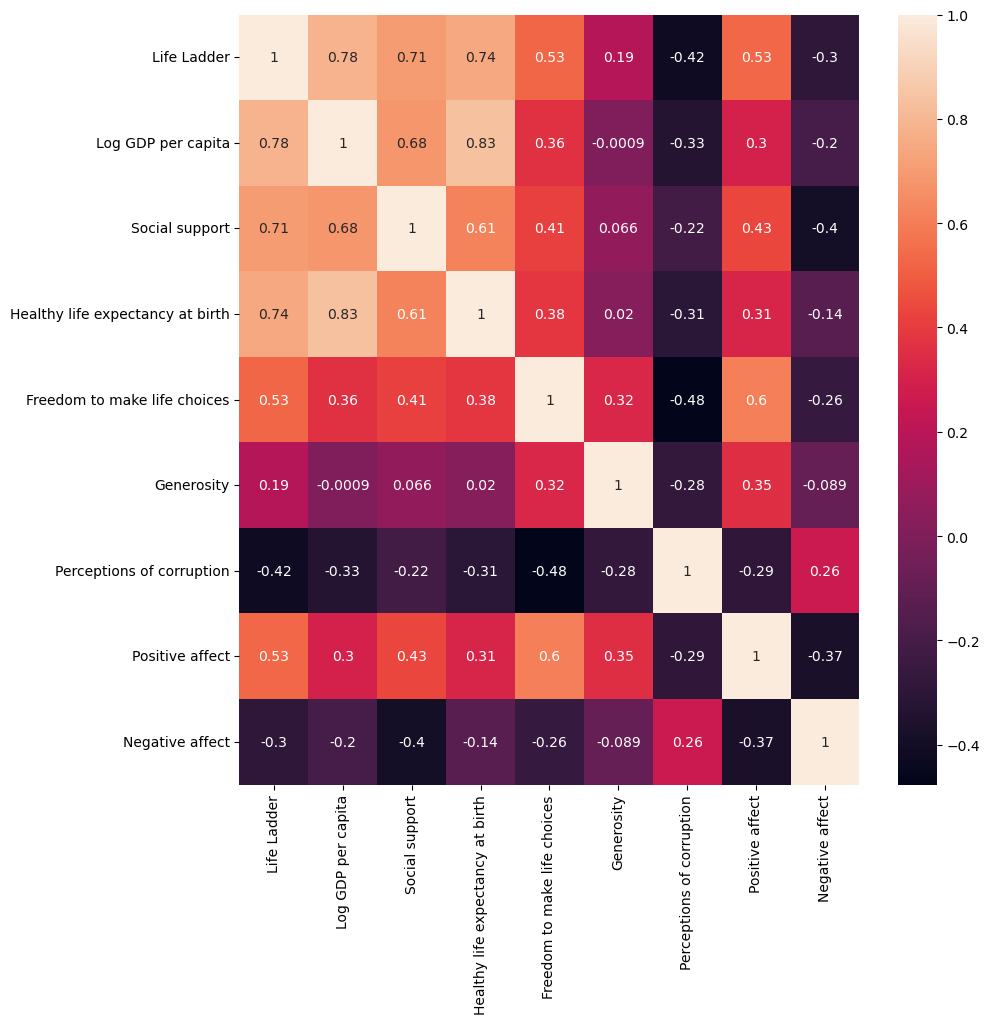

In [11]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating matrix heatmap using seaborn
corr = sns.heatmap(World_sub.corr(), annot = True, ax = ax)

### Q2 Discussion
The Life Ladder serves as a pivotal measure within the framework of the World Happiness Report, prompting respondents to envision a metaphorical ladder where the pinnacle represents their ideal life satisfaction (10) and the nadir signifies the least desirable state (0). In our analysis, we have identified notable correlations between the Life Ladder and key determinants of well-being.

Positive correlations were observed between the Life Ladder and several socio-economic indicators, including Gross Domestic Product (GDP) (0.78), Social Support (0.71), and Life Expectancy (0.74). These coefficients suggest a robust relationship, wherein higher levels of GDP, social support, and life expectancy tend to coincide with elevated levels of life satisfaction.

Conversely, a negative correlation was evident between the Life Ladder and the Perception of Corruption (-0.42). This indicates that as perceptions of corruption within a society increase, individuals' subjective well-being tends to decrease.

The strength of these correlations, depicted by the magnitude of the coefficients ranging from -1 to 1, underscores the significance of these factors in shaping individuals' overall life satisfaction, as captured by the Life Ladder metric.

### Creating a Scatterplot

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


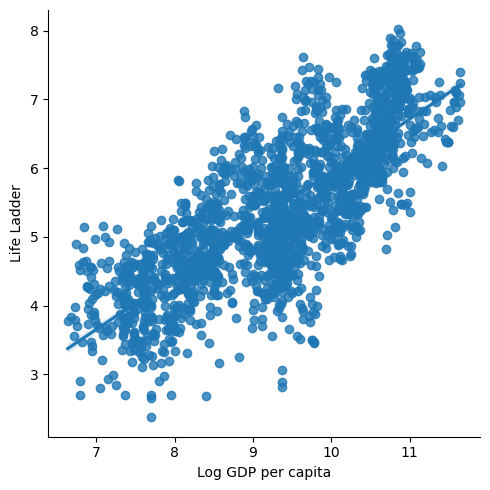

In [12]:
# Scatterplot of most correlated variables
# GDP per capita and Life Ladder scatterplot
sns.lmplot(x = 'Log GDP per capita', y = 'Life Ladder', data = World_sub)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


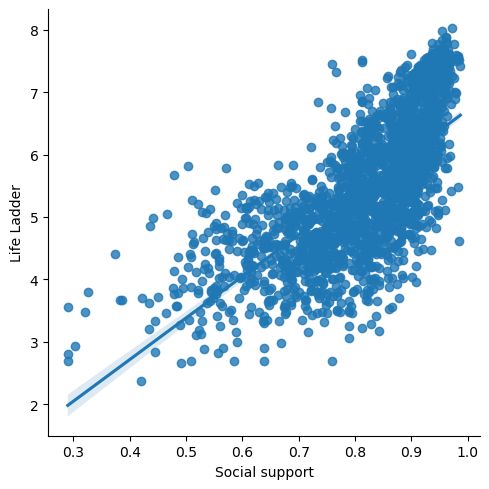

In [13]:
# Social Support and Life Ladder scatterplot
sns.lmplot(x = 'Social support', y = 'Life Ladder', data = World_sub)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


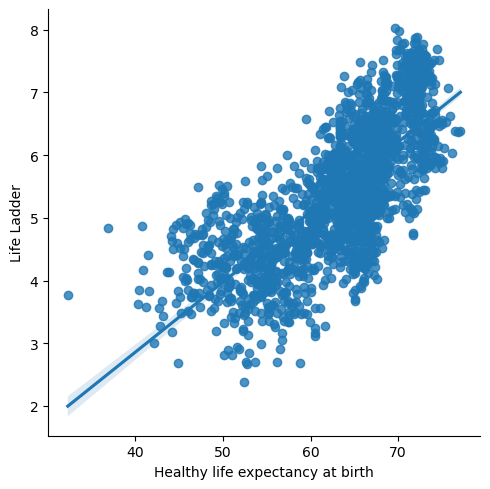

In [14]:
# Life Expectancy and Life Ladder scatterplot
sns.lmplot(x = 'Healthy life expectancy at birth', y = 'Life Ladder', data = World_sub)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


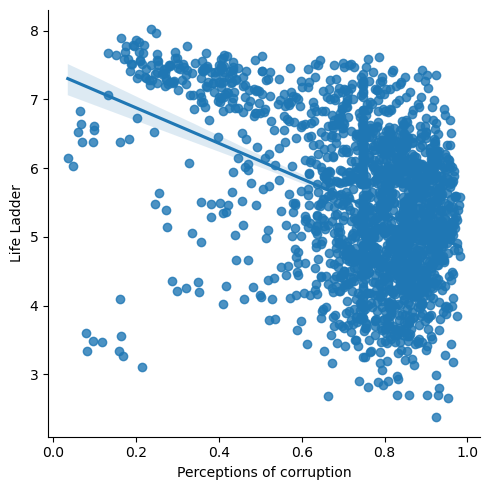

In [15]:
# Corruption and Life Ladder scatterplot
sns.lmplot(x = 'Perceptions of corruption', y = 'Life Ladder', data = World_sub)

### Q4 Discussion

The scatterplots vividly depict the associations between the Life Ladder metric and socio-economic indicators. Notably, strong positive correlations emerge with Gross Domestic Product (GDP) (0.78), Social Support (0.71), and Life Expectancy (0.74). Conversely, a negative correlation is evident with the Perception of Corruption (-0.42). These relationships, graphically represented, highlight the impact of socio-economic factors on individuals' subjective well-being, as measured by the Life Ladder.

### Creating a Pair Plot

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

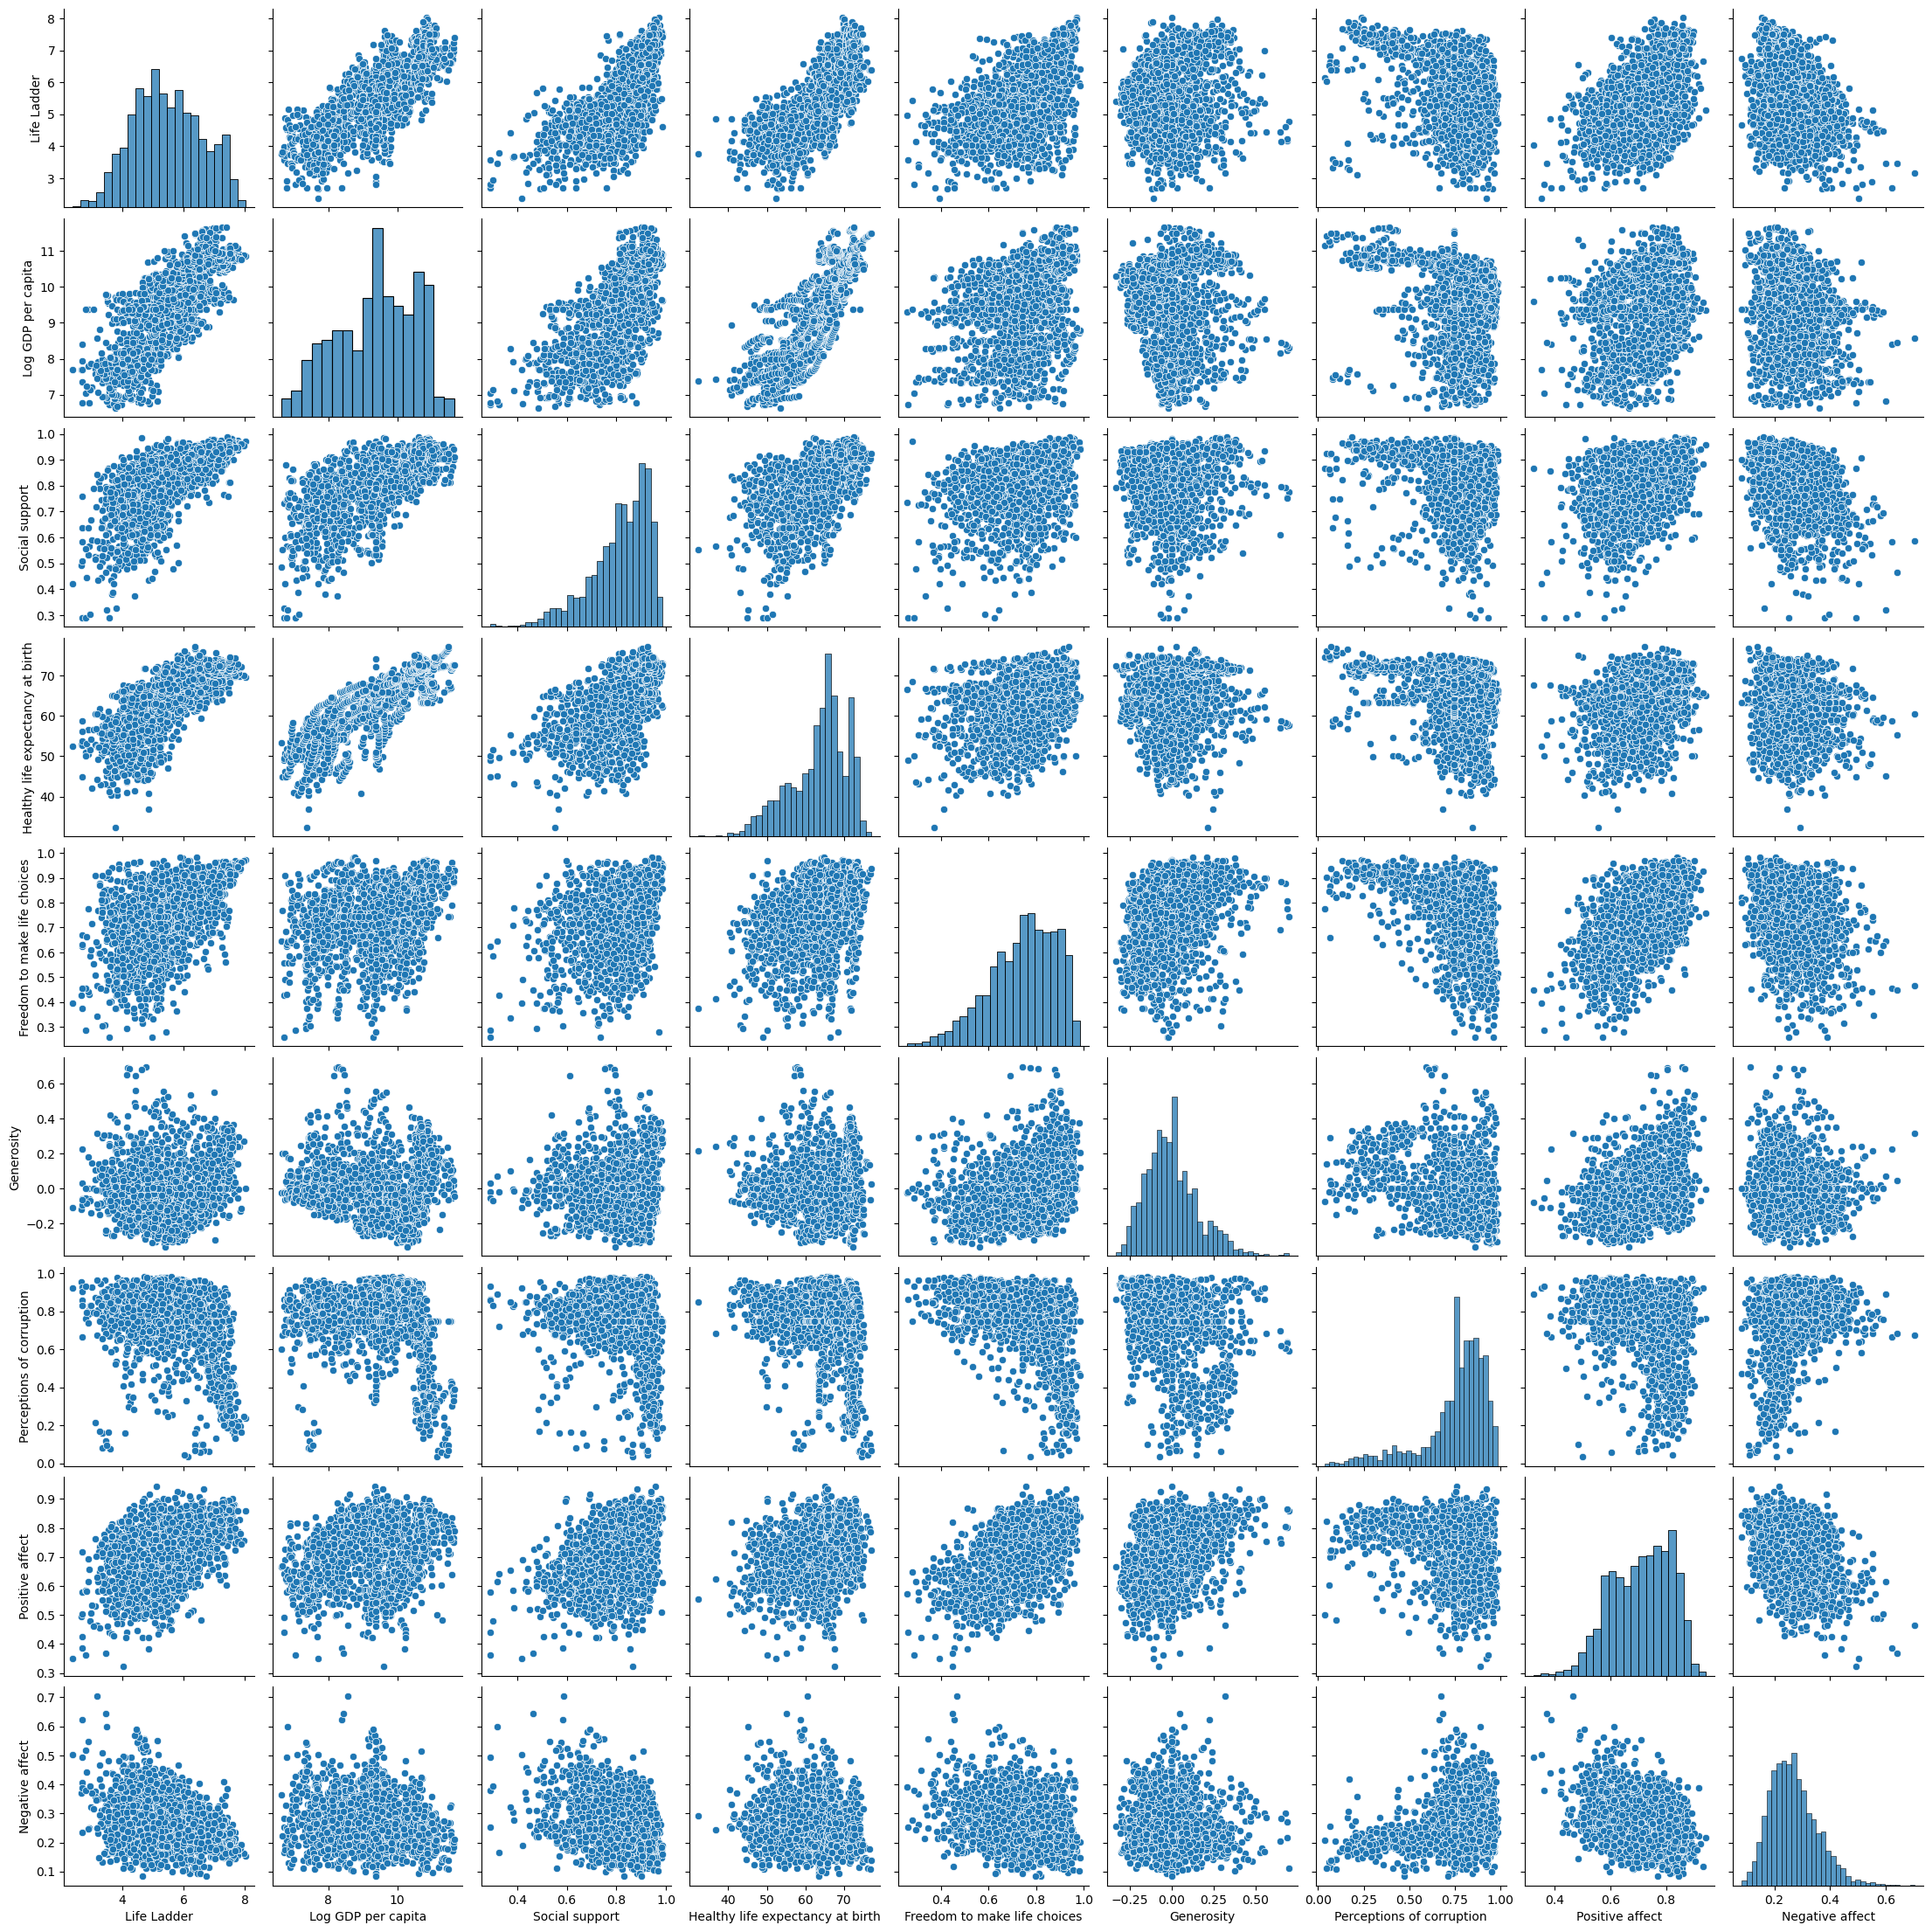

In [16]:
# Creating a pairplot
pair_plot = sns.pairplot( World_sub)

In [17]:
# Creating smaller subsection to see just strongest variables
World_sub_strong =  df_World.drop(['Country name', 'year','Positive affect', 'Negative affect'], axis = 1)





C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

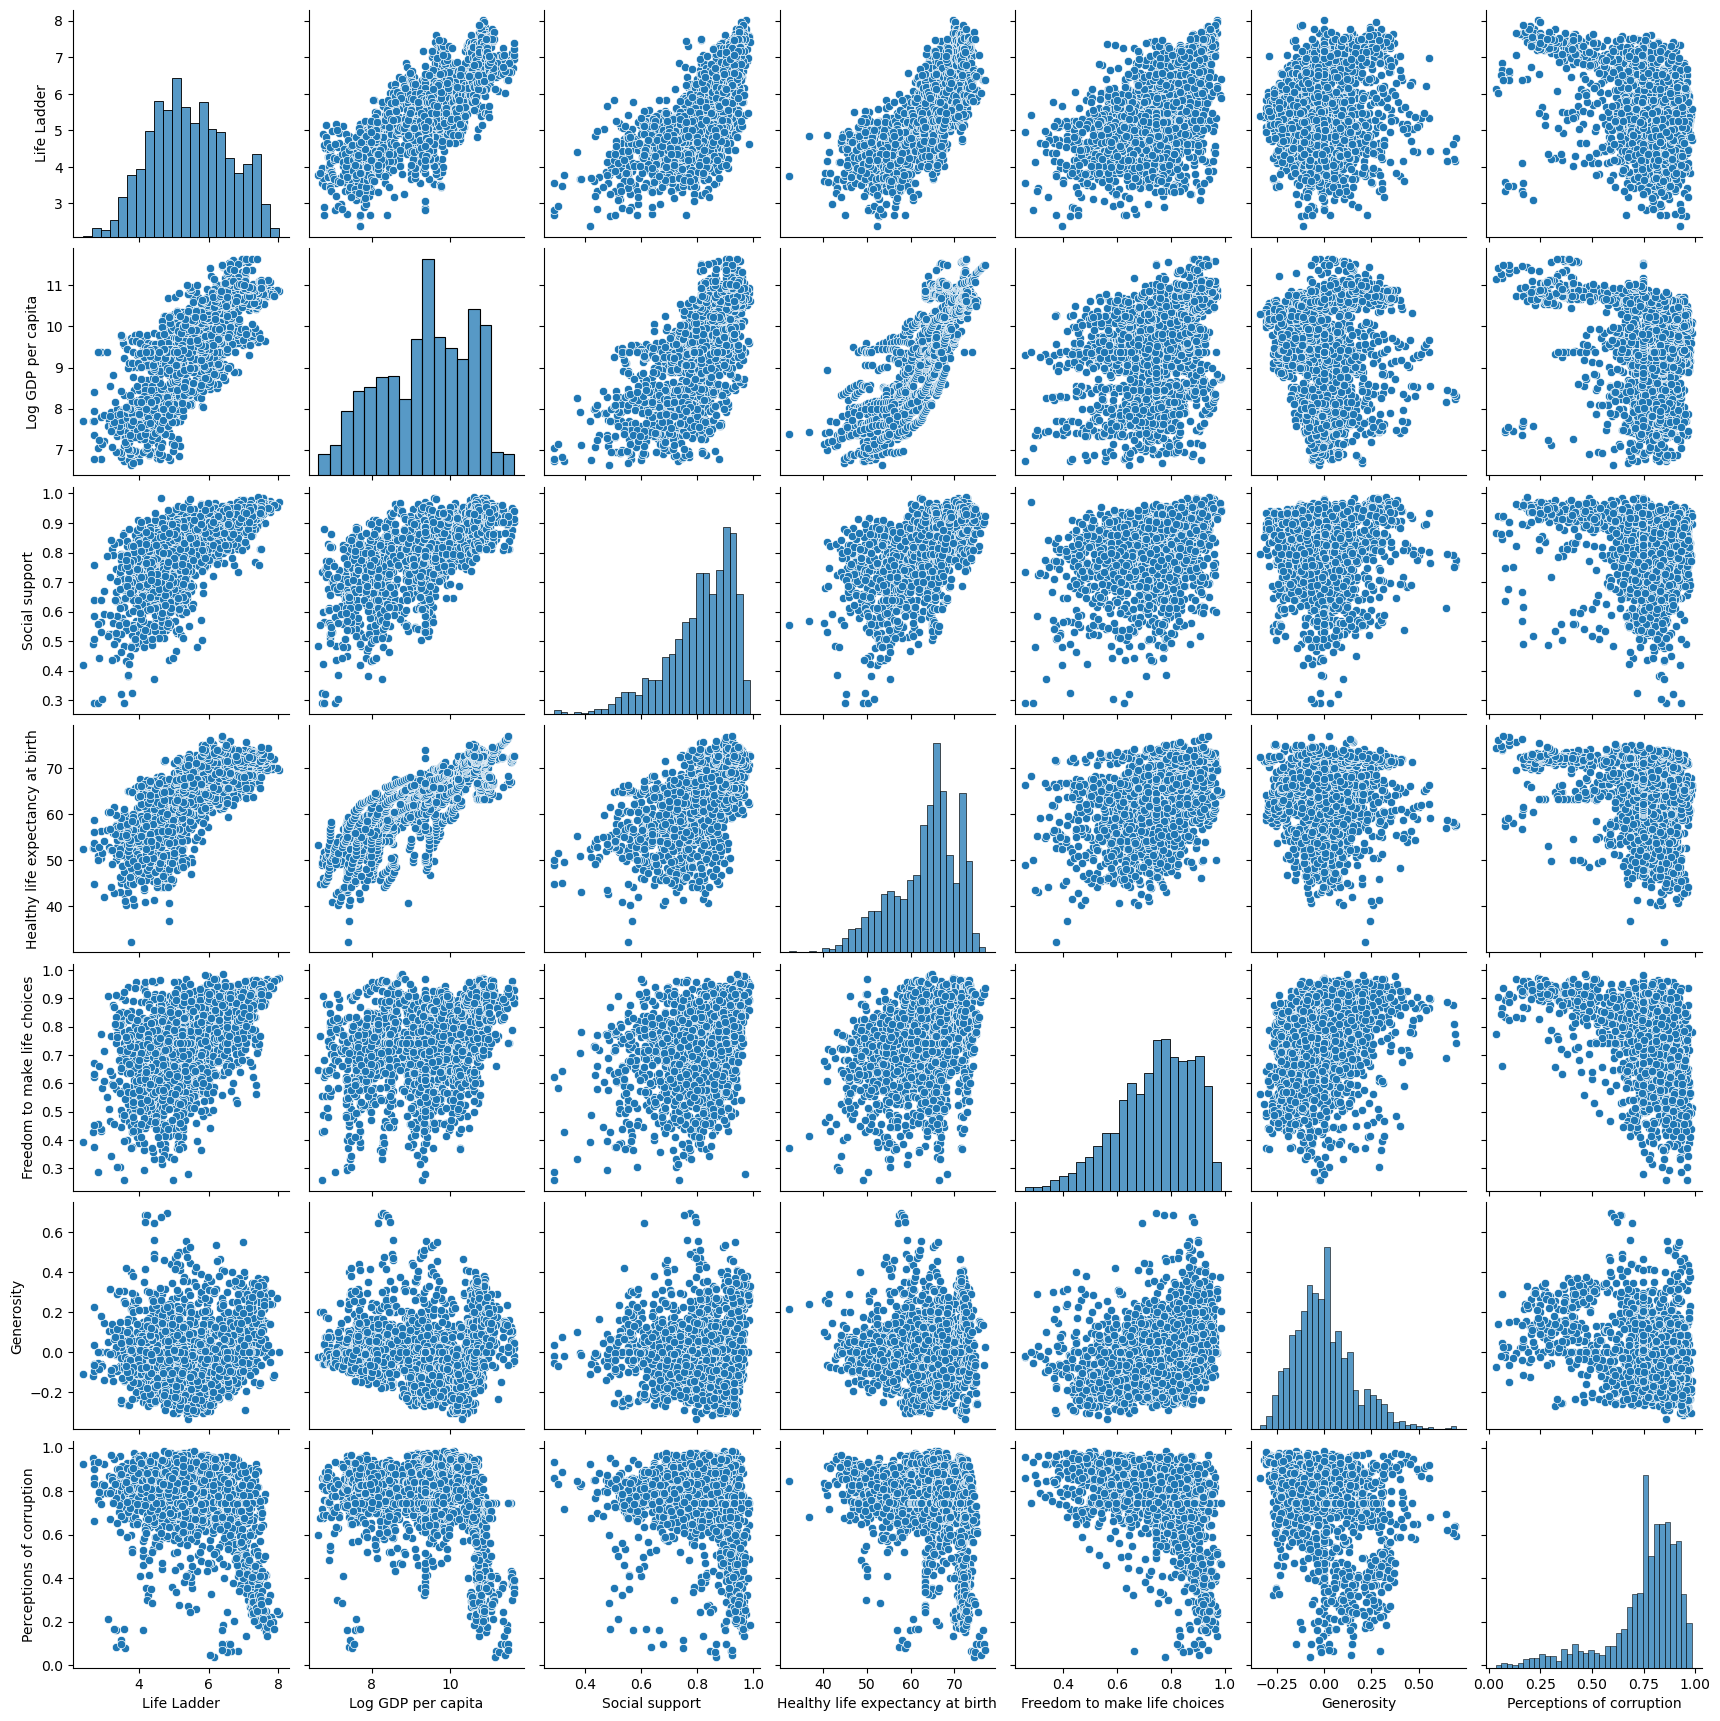

In [18]:
pair_plot_strong = sns.pairplot(World_sub_strong)

### Q5

All the variables mentioned in the report have a strong impact on people's happiness except Generosity.

### Creating a Categorical Plot

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Life Ladder', ylabel='Count'>

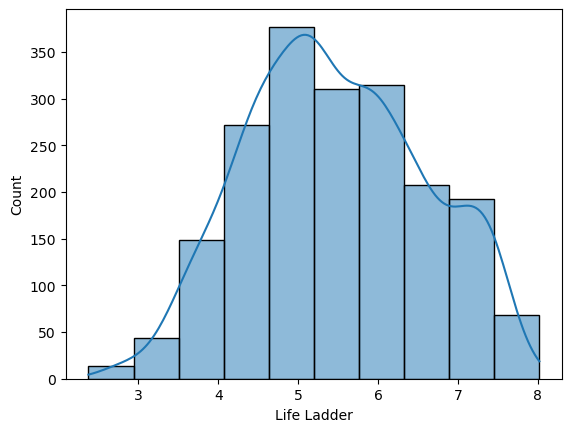

In [19]:
# Creating a histogram to see distribution
sns.histplot(df_World['Life Ladder'], bins = 10, kde = True)

In [20]:
# Creating score category for categorical plot
df_World.loc[df_World['Life Ladder'] < 4.5, 'Score category'] = 'Low score'
df_World.loc[(df_World['Life Ladder'] >= 4.5) & (df_World['Life Ladder'] < 6.5), 'Score category'] = 'Middle score'
df_World.loc[df_World['Life Ladder'] >= 6.5, 'Score category'] = 'High score'
df_World['Score category'].value_counts(dropna=False)


Score category
Middle score    1149
Low score        408
High score       392
Name: count, dtype: int64

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


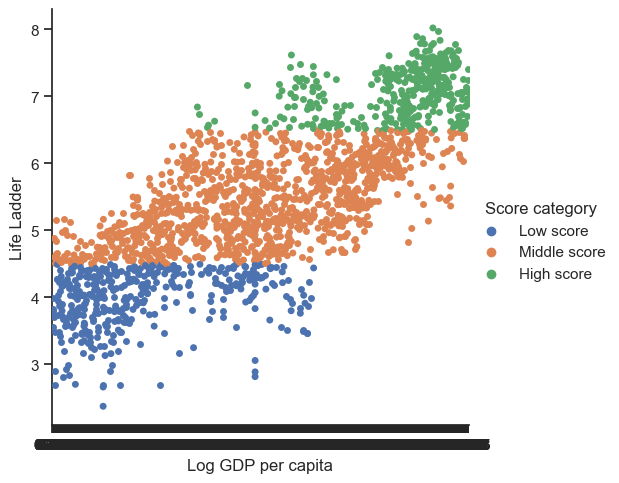

In [21]:
# Creating categorical plot with GDP per Capita
sns.set(style="ticks")
cat_plot_GDP = sns.catplot(x='Log GDP per capita', y= 'Life Ladder', hue="Score category", data=df_World)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


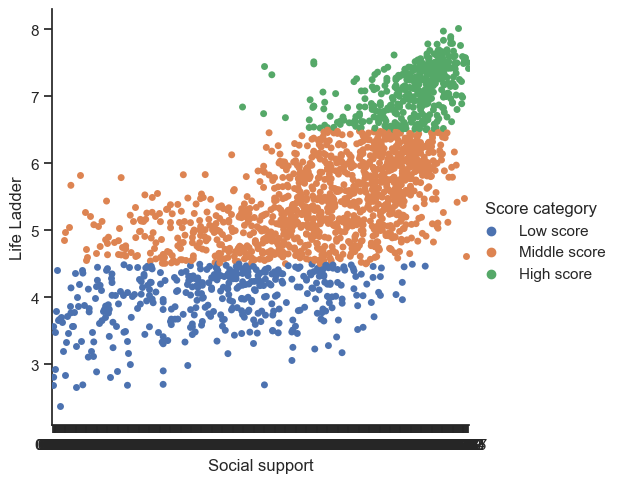

In [22]:
# Creating categorical plot with Social Support 
sns.set(style="ticks")
cat_plot_Social_Support = sns.catplot(x='Social support', y= 'Life Ladder', hue="Score category", data=df_World)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


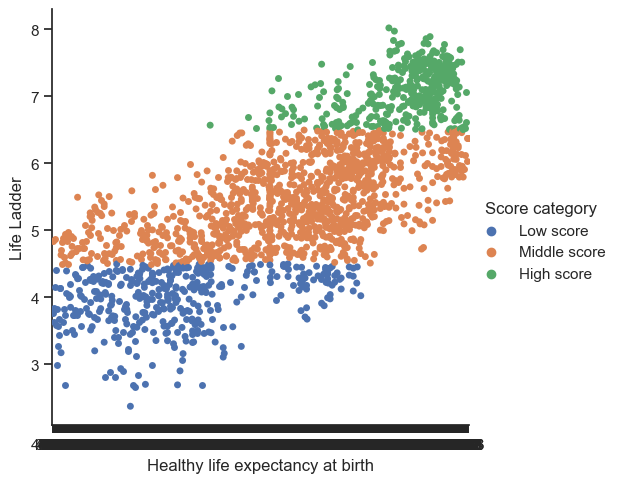

In [23]:
# Creating categorical plot with Healthy life expectancy at birth 
sns.set(style="ticks")
cat_plot_Healthy_life_expectancy_at_birth = sns.catplot(x='Healthy life expectancy at birth', y= 'Life Ladder', hue="Score category", data=df_World)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


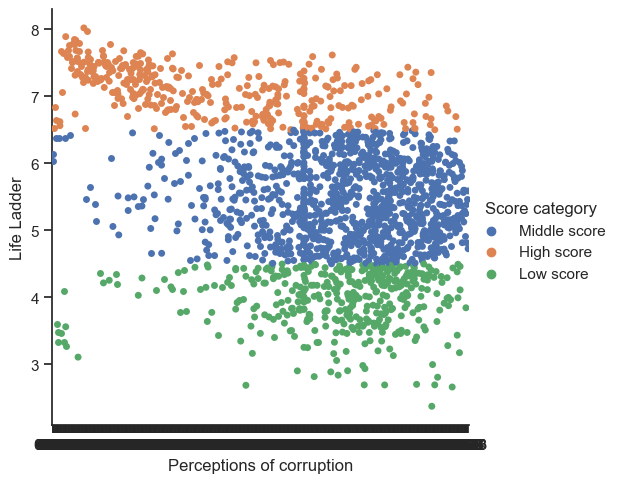

In [24]:
# Creating categorical plot with Social Support 
sns.set(style="ticks")
cat_plot_Perceptions_of_corruption = sns.catplot(x='Perceptions of corruption', y= 'Life Ladder', hue="Score category", data=df_World)

### Q6
I generated categorical plots for multiple variables to analyze and compare their distributions. Remarkably, in each plot, distinct boundaries between low, middle, and high happiness scores are evident. Surprisingly, there are no apparent outliers within this dataset across the variables examined. This outcome aligns with expectations, considering that the creators of this dataset devised algorithms to fill in missing portions of happiness scores

### Q7

Causation vs. Correlation: Are these correlations indicative of causal relationships between socio-economic factors and life satisfaction, or are there other underlying variables that could better explain these associations?

Regional Disparities: Do these correlations hold true across different regions or countries, or are there regional disparities in the relationship between socio-economic factors and life satisfaction?

Temporal Analysis: How have these correlations evolved over time, and are there any notable trends or changes in the relationships between socio-economic indicators and life satisfaction?
Quality of Social Support: Does the quality of social support, rather than just its presence, play a significant role in influencing life satisfaction? How can we measure and quantify the quality of social support?

Perception of Corruption: What specific aspects of corruption perception are most strongly associated with decreased life satisfaction? Are there strategies or policies that can effectively address these perceptions to improve overall well-being?

Other Determinants: Beyond GDP, social support, life expectancy, and corruption perception, what other factors might influence individuals' life satisfaction? Are there cultural or societal factors that are not captured in this analysis but could be significant?

Policy Implications: How can policymakers use these findings to design interventions and policies aimed at enhancing well-being and life satisfaction within their communities or countries?

### Q8

Hypothesis: Higher levels of Gross Domestic Product (GDP), social support, and life expectancy positively influence individuals' subjective well-being, as measured by the Life Ladder metric. Conversely, an increase in the perception of corruption within a society is hypothesized to lead to a decrease in individuals' subjective well-being.

Null Hypothesis: There is no significant relationship between Gross Domestic Product (GDP), social support, life expectancy, perception of corruption, and individuals' subjective well-being, as measured by the Life Ladder metric.

In [25]:
# Export data to pkl

df_World.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_World_62.pkl'))